In [3]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
# data set
mnist = tf.keras.datasets.mnist
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 19s 2us/step


In [7]:
#scaling
x_train = tf.keras.utils.normalize(x_train , axis=1)
x_test = tf.keras.utils.normalize(x_test , axis=1)

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) #input layer
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax')) #putput layer


c:\Users\behes\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [17]:
model.fit(x_train,y_train , epochs=3 , validation_split=0.2)
model.save('handWritten.keras')

Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9949 - loss: 0.0165 - val_accuracy: 0.9812 - val_loss: 0.0621
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9952 - loss: 0.0141 - val_accuracy: 0.9839 - val_loss: 0.0562
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9957 - loss: 0.0127 - val_accuracy: 0.9817 - val_loss: 0.0642


### Can go from hear!

In [18]:
model = tf.keras.models.load_model('handWritten.keras')
loss,accuracy = model.evaluate(x_test,y_test)
print(loss,accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9712 - loss: 0.1258
0.1173928827047348 0.9750999808311462


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
the number is 0


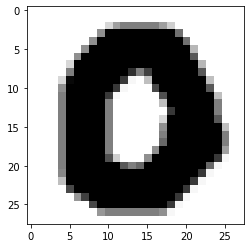

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
the number is 1


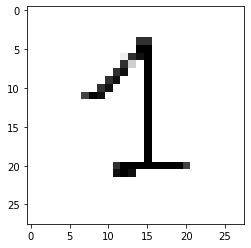

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
the number is 1


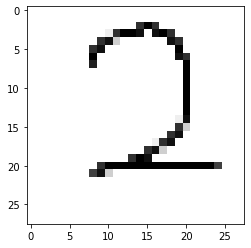

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
the number is 3


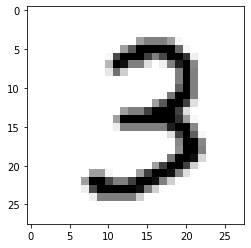

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
the number is 7


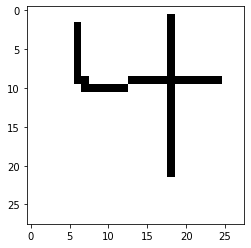

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
the number is 5


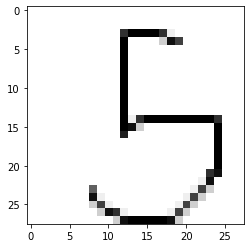

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
the number is 6


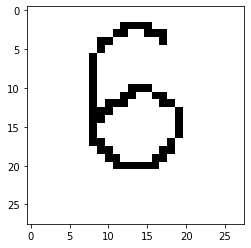

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
the number is 2


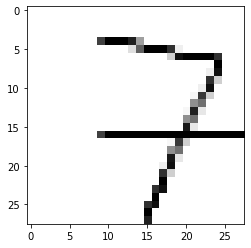

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
the number is 8


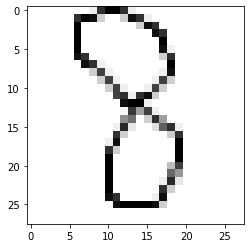

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
the number is 8


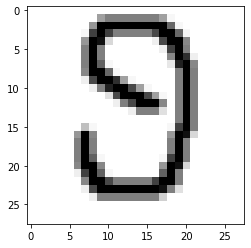

In [22]:
image_number = 0
while os.path.isfile(f"digits/{image_number}.png"):
    try:
        img = cv2.imread(f"digits/{image_number}.png")[:,:,0]
        img   = np.invert(np.array([img]))     
        prediction = model.predict(img)
        print(f"the number is {np.argmax(prediction)}")
        plt.imshow(img[0] , cmap=plt.cm.binary)  
        plt.show()
    except:
        print("ERR!")
    finally:
        image_number+=1